In [81]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
plt.rcParams['figure.figsize'] = (8,6)

1.	На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб). 

In [83]:
df = pd.read_csv('student_mental_health.csv', sep=',', parse_dates=['Timestamp'])
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-08-07 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


2.	В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [84]:
print(f"Размер датасета: {df.shape}")

Размер датасета: (101, 11)


Предметная область - оценка ментального здоровья студентов. Целевая переменная - "Did you seek any specialist for a treatment?", то есть ищет ли студент психолога. Задача обучения - классификация.

Признаки:
* Timestamp - время опроса
* Choose your gender - пол участника
* Age - возраст участника
* What is your course? - курс участника
* Your current year of Study - год обучения
* What is your CGPA? - средний балл
* Marital status - семейное положение
* Do you have Depression? - есть ли депрессия
* Do you have Anxiety? - есть ли тревожность
* Do you have Panic attack? - есть ли панические атаки
* Did you seek any specialist for a treatment? - нужен ли психолог

In [85]:
df.rename(columns={'Choose your gender': 'gender', 
                    'What is your course?': 'course',
                    'Your current year of Study': 'yearOfStudy',
                    'What is your CGPA?': 'CGPA',
                    'Do you have Depression?': 'depression',
                    'Do you have Anxiety?': 'anxiety',
                    'Do you have Panic attack?': 'panicAttack',
                    'Did you seek any specialist for a treatment?': 'seekSpecialist',
                    'Marital status': 'marital',}, inplace=True)

In [86]:
df.head()

,Timestamp,gender,Age,course,yearOfStudy,CGPA,marital,depression,anxiety,panicAttack,seekSpecialist
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-08-07 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### 3.	Описательная статистика

a.	исследование шкалы измерения каждого существенного признака;


In [87]:
df.dtypes

Timestamp         datetime64[ns]
gender                    object
Age                      float64
course                    object
yearOfStudy               object
CGPA                      object
marital                   object
depression                object
anxiety                   object
panicAttack               object
seekSpecialist            object
dtype: object

In [88]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [89]:
pd.Series({i: df[i].unique() for i in df})

Timestamp         [2020-08-07T12:02:00.000000000, 2020-08-07T12:...
gender                                               [Female, Male]
Age                 [18.0, 21.0, 19.0, 22.0, 23.0, 20.0, 24.0, nan]
course            [Engineering, Islamic education, BIT, Laws, Ma...
yearOfStudy       [year 1, year 2, Year 1, year 3, year 4, Year ...
CGPA              [3.00 - 3.49, 3.50 - 4.00, 3.50 - 4.00 , 2.50 ...
marital                                                   [No, Yes]
depression                                                [Yes, No]
anxiety                                                   [No, Yes]
panicAttack                                               [Yes, No]
seekSpecialist                                            [No, Yes]
dtype: object

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


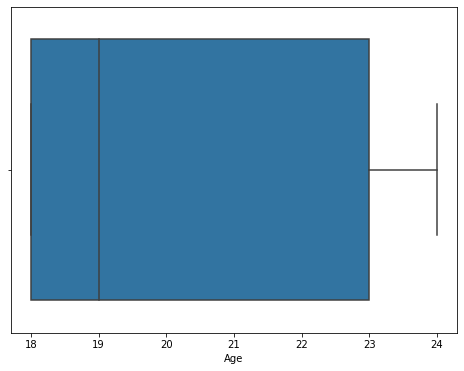

In [91]:
sns.boxplot('Age', data=df);

b.	построение эмпирического распределения каждого существенного признака;

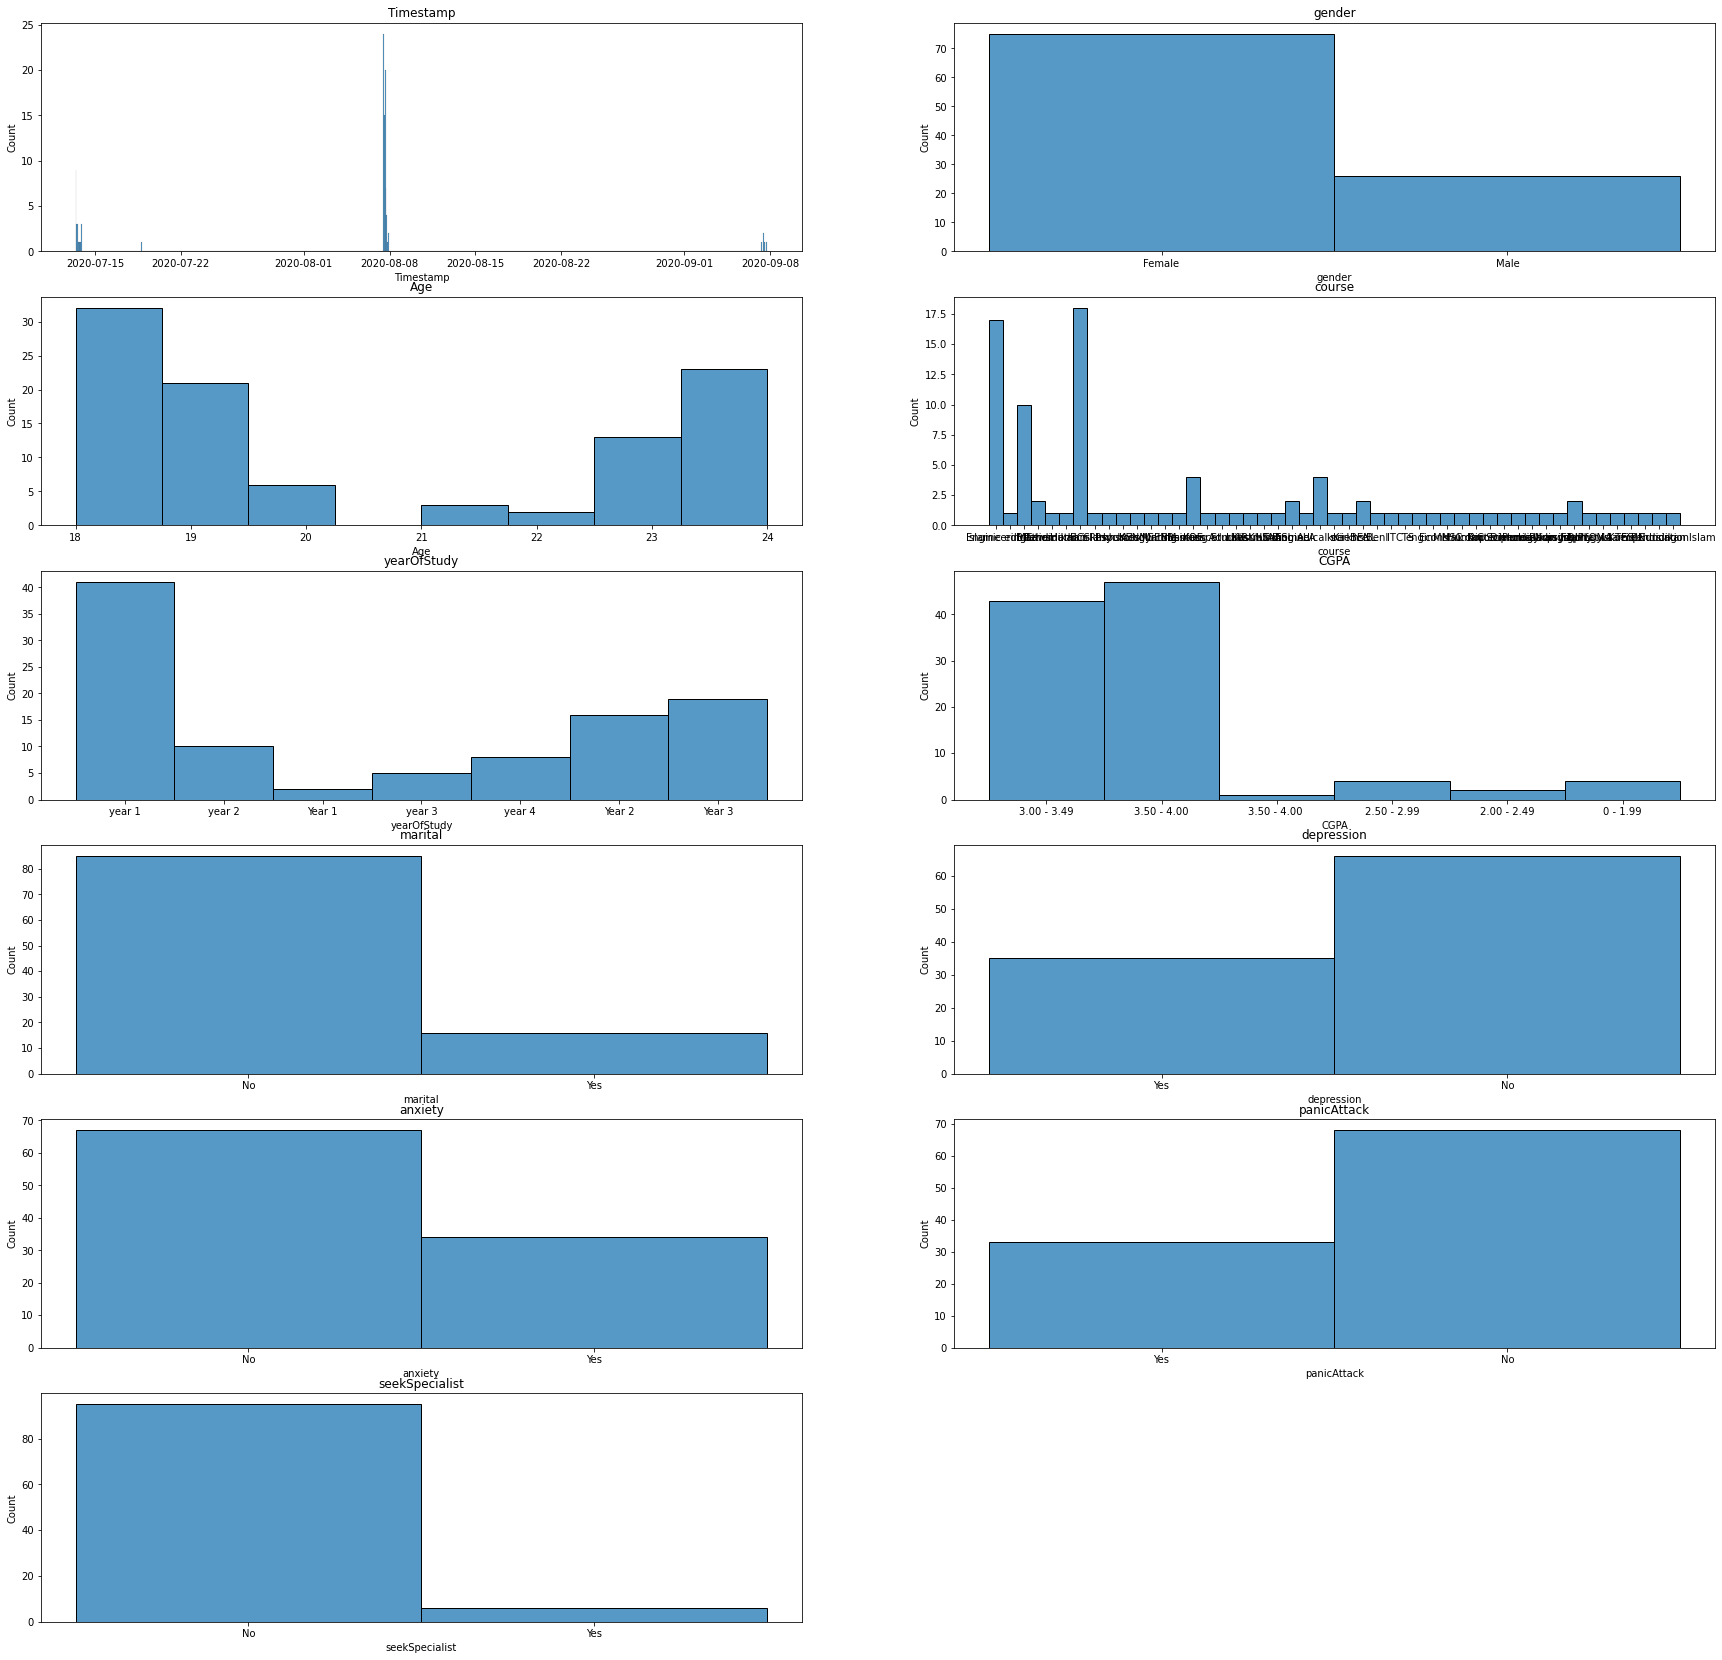

In [92]:
plt.rcParams['figure.figsize'] = (30,100)
for i, col in enumerate(df.columns):
    plt.subplot(20, 2, i+1)
    sns.histplot(x=col, data=df);
    plt.title(col)

c.	анализ количества и распределения отсутствующих значений;



In [93]:
df.isnull().sum()

Timestamp         0
gender            0
Age               1
course            0
yearOfStudy       0
CGPA              0
marital           0
depression        0
anxiety           0
panicAttack       0
seekSpecialist    0
dtype: int64

d.	построение совместного распределения каждого признака и целевой переменной;



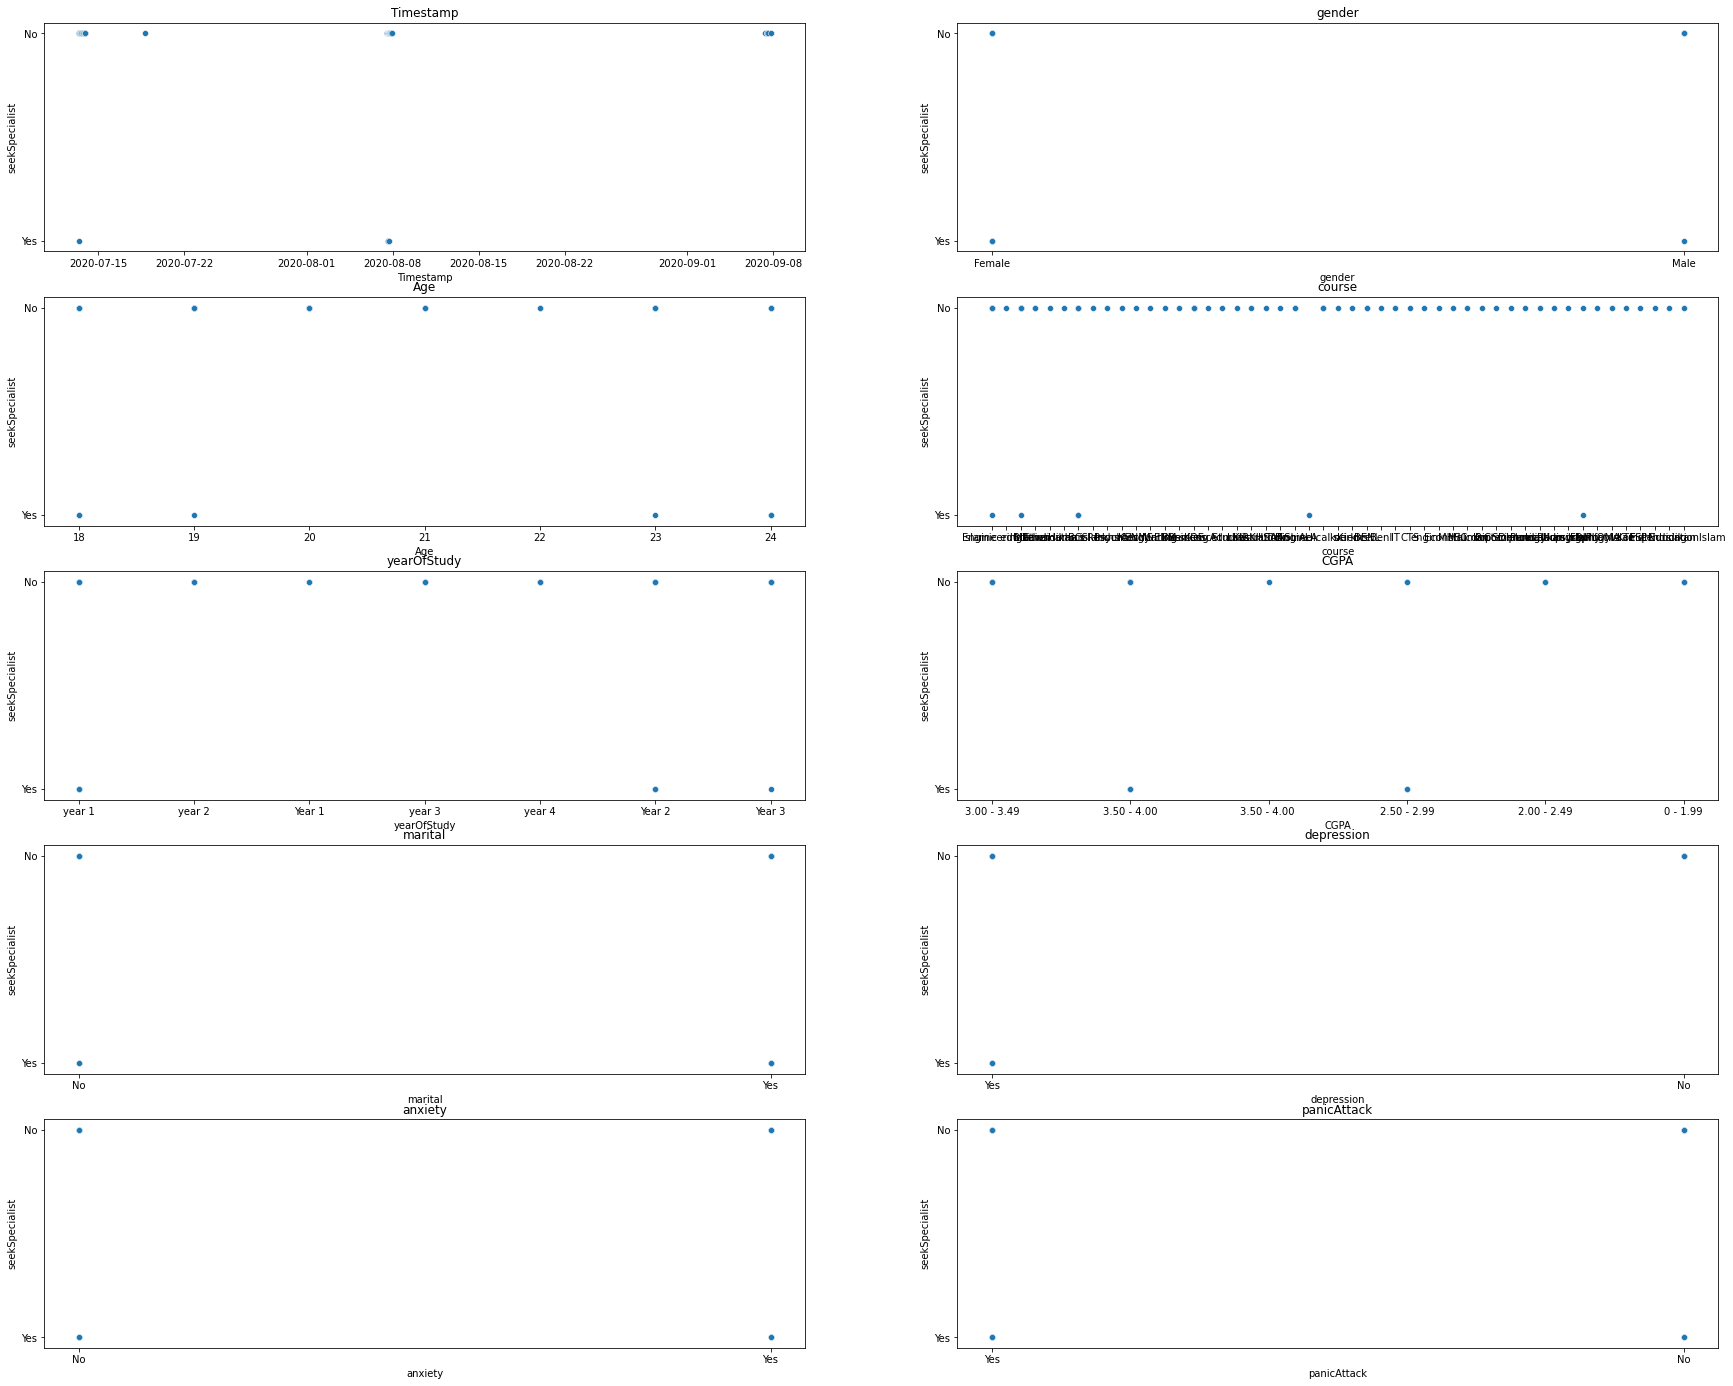

In [94]:
plt.rcParams['figure.figsize'] = (30,100)
for i, col in enumerate(df.columns.drop("seekSpecialist")):
    plt.subplot(20, 2, i+1)
    sns.scatterplot(x=col, y='seekSpecialist', data=df);
    plt.title(col)

e.	построение корреляционной матрицы.

<AxesSubplot:>

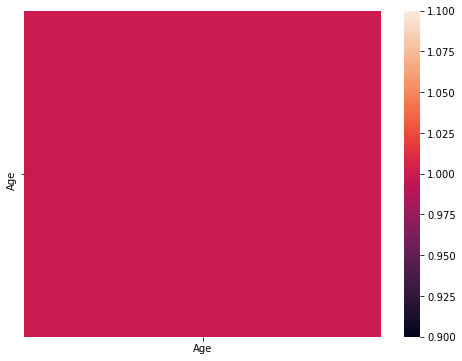

In [95]:
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(df.corr())

5.	Провести подготовительную обработку данных, включающую следующие шаги:

a.	удаление или заполнение отсутствующих значений;

b.	приведение всех признаков к бинарной либо числовой шкале;

c.	удаление несущественных либо избыточных признаков;

d.	другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).


In [104]:
df.isnull().sum()

Timestamp         0
gender            0
Age               1
course            0
yearOfStudy       0
CGPA              0
marital           0
depression        0
anxiety           0
panicAttack       0
seekSpecialist    0
dtype: int64

* yearOfStudy

In [97]:
df['yearOfStudy'].sort_values().unique()

array(['Year 1', 'Year 2', 'Year 3', 'year 1', 'year 2', 'year 3',
       'year 4'], dtype=object)

In [98]:
df['yearOfStudy'] = df['yearOfStudy'].str.lower().str.replace('year', '')
df = df.astype({'yearOfStudy': 'int64'})

In [99]:
df['yearOfStudy'].sort_values().unique()

array([1, 2, 3, 4], dtype=int64)

<AxesSubplot:xlabel='yearOfStudy', ylabel='Count'>

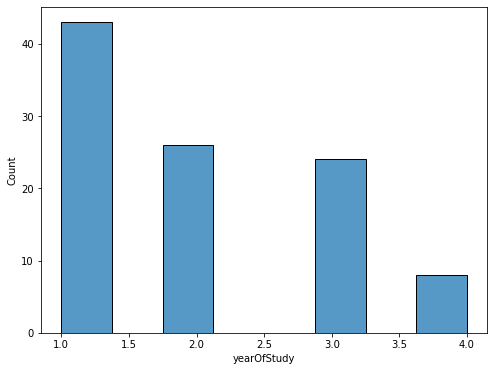

In [100]:
sns.histplot(df['yearOfStudy'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


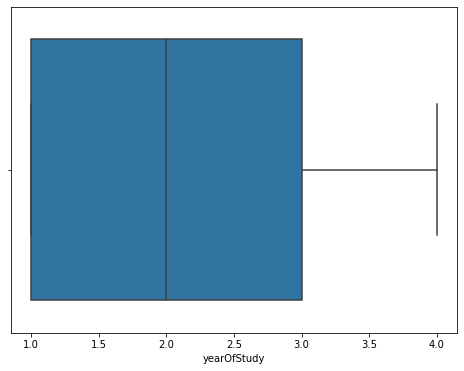

In [102]:
sns.boxplot(df['yearOfStudy'])

* Age

In [105]:
df['Age'].sort_values().unique()

array([18., 19., 20., 21., 22., 23., 24., nan])

In [116]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].median()

In [117]:
df['Age'].sort_values().unique()

array([18., 19., 20., 21., 22., 23., 24.])

6.	Количественные характеристики датасета после его обработки.

a.	исследование шкалы измерения каждого существенного признака;


In [119]:
df.isnull().sum()

Timestamp         0
gender            0
Age               0
course            0
yearOfStudy       0
CGPA              0
marital           0
depression        0
anxiety           0
panicAttack       0
seekSpecialist    0
dtype: int64

In [120]:
df.describe()

,Age,yearOfStudy
count,101.000000,101.000000
mean,20.514851,1.970297
std,2.488429,0.994540
min,18.000000,1.000000
25%,18.000000,1.000000
50%,19.000000,2.000000
75%,23.000000,3.000000
max,24.000000,4.000000


In [121]:
pd.Series({i: df[i].unique() for i in df})

Timestamp         [2020-08-07T12:02:00.000000000, 2020-08-07T12:...
gender                                               [Female, Male]
Age                      [18.0, 21.0, 19.0, 22.0, 23.0, 20.0, 24.0]
course            [Engineering, Islamic education, BIT, Laws, Ma...
yearOfStudy                                            [1, 2, 3, 4]
CGPA              [3.00 - 3.49, 3.50 - 4.00, 3.50 - 4.00 , 2.50 ...
marital                                                   [No, Yes]
depression                                                [Yes, No]
anxiety                                                   [No, Yes]
panicAttack                                               [Yes, No]
seekSpecialist                                            [No, Yes]
dtype: object

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


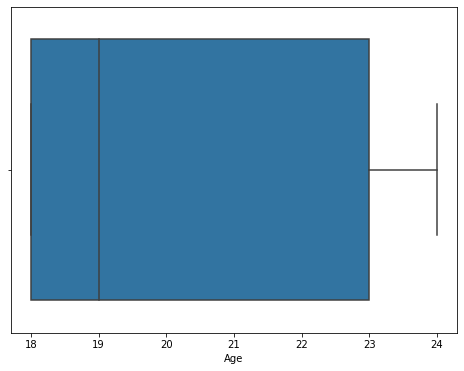

In [ ]:
sns.boxplot('Age', data=df);

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


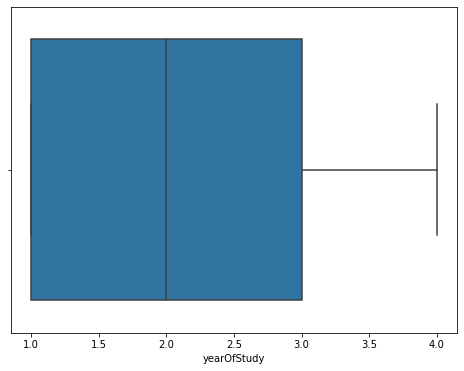

In [122]:
sns.boxplot('yearOfStudy', data=df);

b.	построение эмпирического распределения каждого существенного признака;

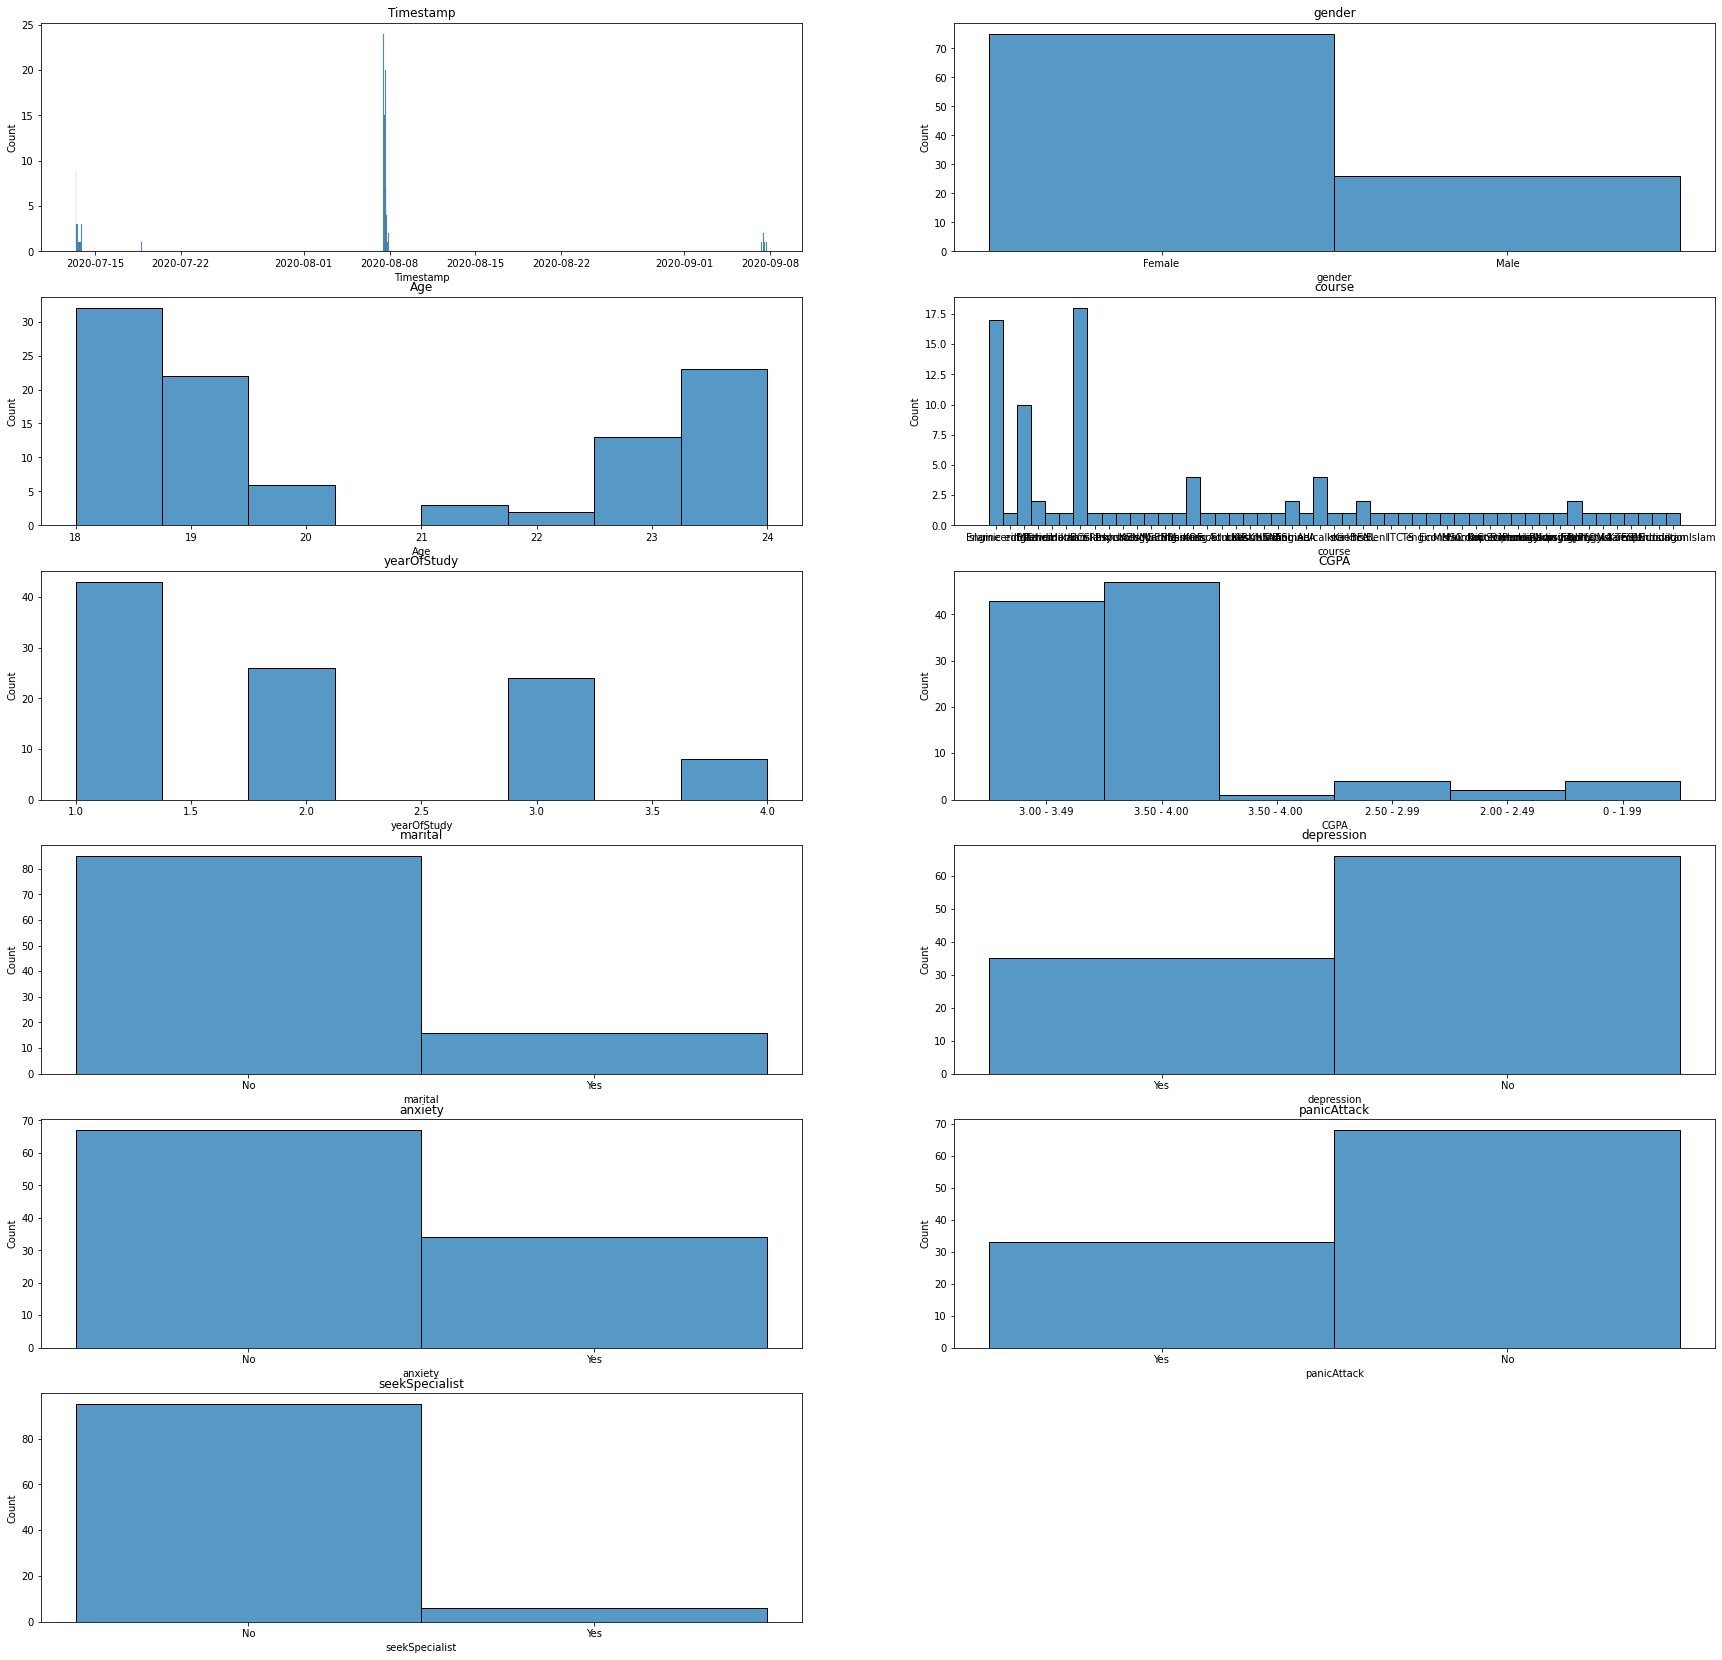

In [123]:
plt.rcParams['figure.figsize'] = (30,100)
for i, col in enumerate(df.columns):
    plt.subplot(20, 2, i+1)
    sns.histplot(x=col, data=df);
    plt.title(col)

d.	построение совместного распределения каждого признака и целевой переменной;



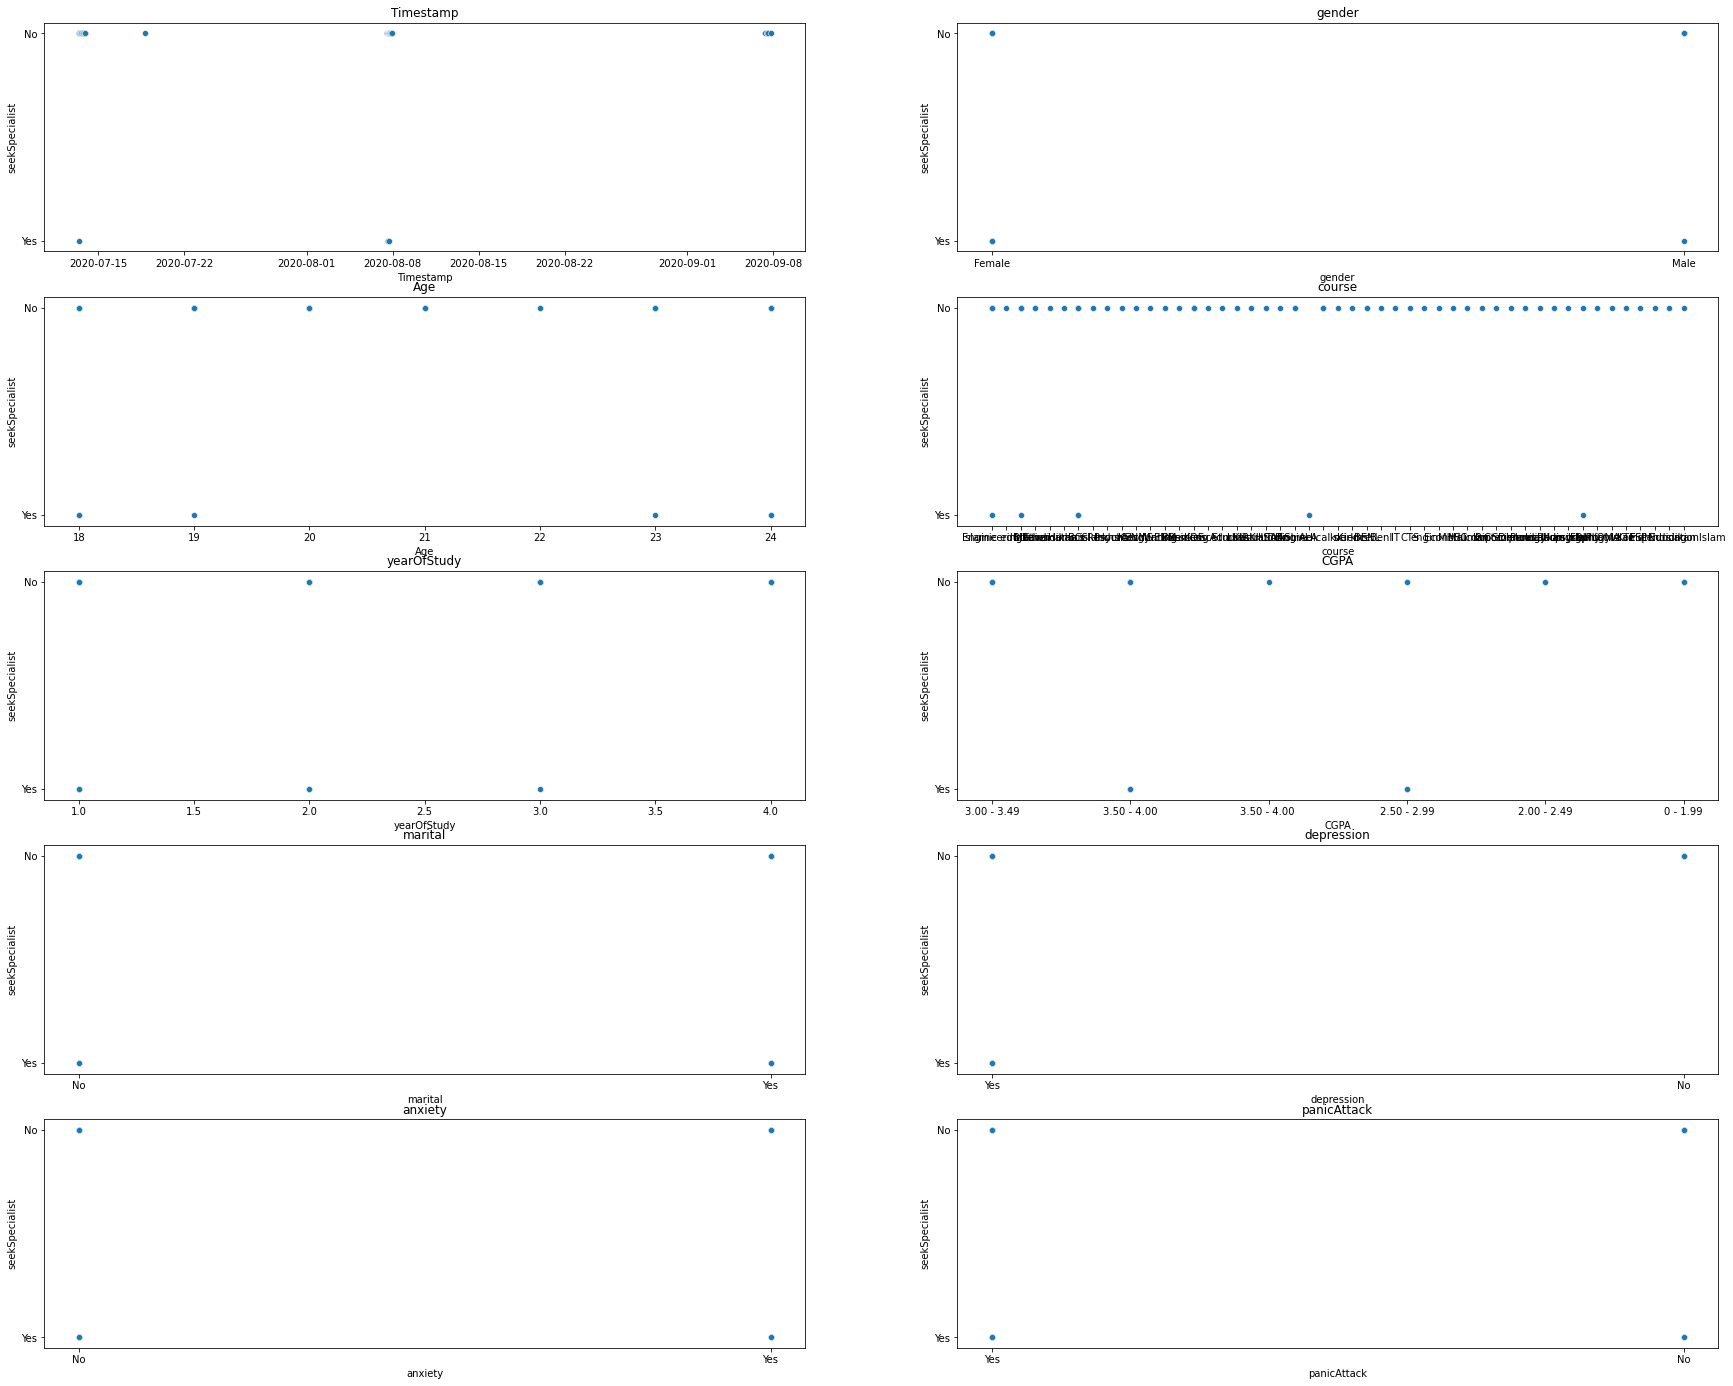

In [138]:
plt.rcParams['figure.figsize'] = (30,100)
for i, col in enumerate(df.columns.drop("seekSpecialist")):
    plt.subplot(20, 2, i+1)
    sns.scatterplot(x=col, y='seekSpecialist', data=df);
    plt.title(col)

e.	построение корреляционной матрицы.

<AxesSubplot:>

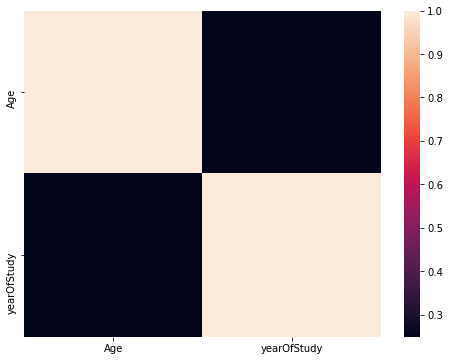

In [125]:
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(df.corr())